# API 서버에 통신하기

In [4]:
import requests

response = requests.get('https://api.github.com/repositories',headers={'Accept': 'application/vnd.github.v3+json'})

print(response.status_code)

200


# response headers 살펴보기

In [6]:
# response에 대한 요소 확인
print(f"인코딩: {response.encoding}")
print(f"콘텐츠 타입: {response.headers['Content-Type']}")
print(f"서버: {response.headers['server']}")

인코딩: utf-8
콘텐츠 타입: application/json; charset=utf-8
서버: GitHub.com


# Json
-> 요청으로 받아온 콘텐츠 타입이 application/json이기 때문에 json으로 변환 가능한 객체임을 알 수 있습니다. 이는 json 라이브러리를 활용하여 쉽게 구조화할 수 있습니다.

In [7]:
import json
print(json.dumps(response.json()[0], indent=2)[:200])

{
  "id": 1,
  "node_id": "MDEwOlJlcG9zaXRvcnkx",
  "name": "grit",
  "full_name": "mojombo/grit",
  "private": false,
  "owner": {
    "login": "mojombo",
    "id": 1,
    "node_id": "MDQ6VXNlcjE=",



In [8]:
response.headers

{'Server': 'GitHub.com', 'Date': 'Mon, 27 Feb 2023 05:38:26 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"3b08785a912fd9158abc75739a1173520f25f493467dd3eaef5d02674b84ca0f"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/repositories?since=369>; rel="next", <https://api.github.com/repositories{?since}>; rel="first"', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-

In [17]:
# public repositories
# response.json()

# 요청 시 Parameter 활용하기

In [10]:
# 422 error
response = requests.get('https://api.github.com/search/repositories')
print(response.status_code)

422


In [14]:
# 422 error
response = requests.get('https://api.github.com/search/repositories',
                       params ={'q': 'data_science+language:python'}, # query parameters(required)
                       headers={'Accept': 'application/vnd.github.v3.text-match+json'})
print(response.status_code)

200


# 응답 헤더 확인하기

In [15]:
response.headers

{'Server': 'GitHub.com', 'Date': 'Mon, 27 Feb 2023 06:39:24 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'no-cache', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'X-GitHub-Media-Type': 'github.v3; param=text-match; format=json', 'Link': '<https://api.github.com/search/repositories?q=data_science%2Blanguage%3Apython&page=2>; rel="next", <https://api.github.com/search/repositories?q=data_science%2Blanguage%3Apython&page=34>; rel="last"', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Conte

# json 콘텐츠 딕셔너리로 변환하기

In [16]:
import json
response.json()

{'total_count': 17259,
 'incomplete_results': False,
 'items': [{'id': 26382146,
   'node_id': 'MDEwOlJlcG9zaXRvcnkyNjM4MjE0Ng==',
   'name': 'data-science-from-scratch',
   'full_name': 'joelgrus/data-science-from-scratch',
   'private': False,
   'owner': {'login': 'joelgrus',
    'id': 1308313,
    'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
    'avatar_url': 'https://avatars.githubusercontent.com/u/1308313?v=4',
    'gravatar_id': '',
    'url': 'https://api.github.com/users/joelgrus',
    'html_url': 'https://github.com/joelgrus',
    'followers_url': 'https://api.github.com/users/joelgrus/followers',
    'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
    'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
    'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
    'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
    'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
  

In [18]:
# 연습 문제
response.json().keys()

dict_keys(['total_count', 'incomplete_results', 'items'])

In [ ]:
total_count는 items의 총 개수
incomplete_results는 결과가 불완전한지에 대한 true/false 값
items는 repositories 목록으로 아래코드는 items의 갯수 확인

In [19]:
len(response.json()['items'])

30

In [20]:
response.json()['items'][0]['text_matches']

[{'object_url': 'https://api.github.com/repositories/26382146',
  'object_type': 'Repository',
  'property': 'description',
  'fragment': 'code for Data Science From Scratch book',
  'matches': [{'text': 'Data Science', 'indices': [9, 21]}]},
 {'object_url': 'https://api.github.com/repositories/26382146',
  'object_type': 'Repository',
  'property': 'name',
  'fragment': 'data-science-from-scratch',
  'matches': [{'text': 'data', 'indices': [0, 4]}]}]

In [23]:
# 연습 문제
items = response.json()['items']
items[0]['name']

'data-science-from-scratch'

In [24]:
# 연습 문제
items[0]['text_matches'][0]['property']

'description'

In [25]:
# 연습 문제
items[0]['text_matches'][0]['fragment']

'code for Data Science From Scratch book'

In [26]:
# 연습 문제
items[0]['text_matches'][0]['matches']

[{'text': 'Data Science', 'indices': [9, 21]}]

In [27]:
for item in response.json()['items']:
    print(item['name'] + ': repository ' +
          item['text_matches'][0]['property'] + ' - \"' +
          item['text_matches'][0]['fragment'] + ' - \" matched with ' +
          item['text_matches'][0]['matches'][0]['text']
         )

data-science-from-scratch: repository description - "code for Data Science From Scratch book - " matched with Data Science
PySyft: repository description - "data science on data without acquiring a copy - " matched with data science
data-science-blogs: repository description - "A curated list of data science blogs - " matched with data science
galaxy: repository description - "Data intensive science for everyone. - " matched with Data
DataCamp: repository description - "DataCamp data-science courses - " matched with data
data-scientist-roadmap: repository description - "Toturials coming with the "data science roadmap" picture. - " matched with data science
dsp: repository description - "data science preparation - " matched with data science
cookiecutter-data-science: repository description - "A logical, reasonably standardized, but flexible project structure for doing and sharing data science work. - " matched with data science
Kaggler: repository description - "Code for Kaggle Data Sc

# 저장소의 댓글 데이터 가져오기

In [28]:
response = requests.get('https://api.github.com/repos/pytorch/pytorch/issues',
                        headers={'Accept': 'application/vnd.github.v3.text-match+json'})
print('Response Code', response.status_code)
print('Number of comments', len(response.json()))

Response Code 200
Number of comments 30


# Pagination
-> 응답 개수를 제한해서 서버의 과부화를 방지하기 위한 기술로 많은 API에 적용.

In [29]:
response.links

{'next': {'url': 'https://api.github.com/repositories/65600975/issues?page=2',
  'rel': 'next'},
 'last': {'url': 'https://api.github.com/repositories/65600975/issues?page=371',
  'rel': 'last'}}

# 다음 링크가 있다면 계속 API를 호출하는 함수 만들기

In [30]:
def get_all_pages(url, params=None, headers=None):
    output_json = []
    response = requests.get(url, params=params, headers=headers)
    if response.status_code == 200:
        output_json = response.json()
        if 'next' in response.links:
            next_url = response.links['next']['url']
            if next_url is not None:
                output_json += get_all_pages(next_url, params, headers)
    return output_json

In [ ]:
# 재귀함수

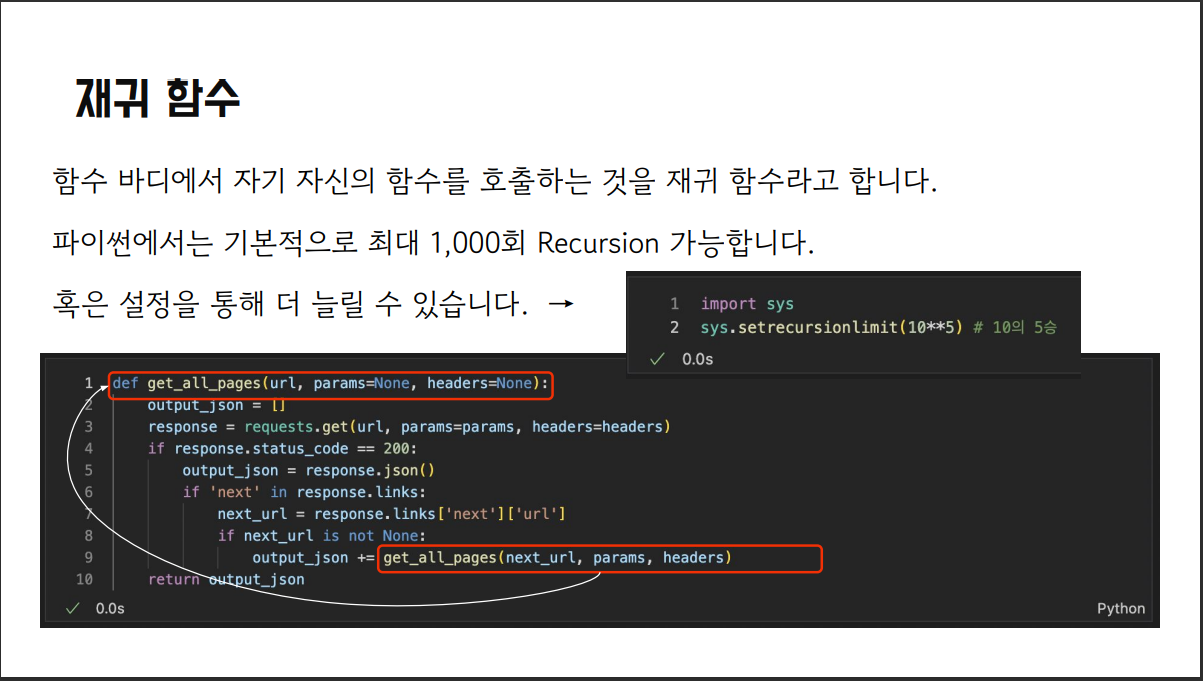

In [31]:
# 결과확인
import pandas as pd

out = get_all_pages(
    'https://api.github.com/repos/pytorch/pytorch/issues/comments',
    params={
        'since': '2022-01-01T10:00:01Z',
        'sorted': 'created',
        'direction': 'desc'
    },
    headers = {'Accept': 'application/vnd.github.v3+json'}
)

df = pd.DataFrame(out)
print(df['body'].count())
df[['id', 'created_at', 'body']].sample(1)

270


,id,created_at,body
192,1445226770,2023-02-25T23:30:24Z,Thanks for great and quick fix!\r\nJust confir...


In [ ]:
# 시간당 속도 제한(rate limit)

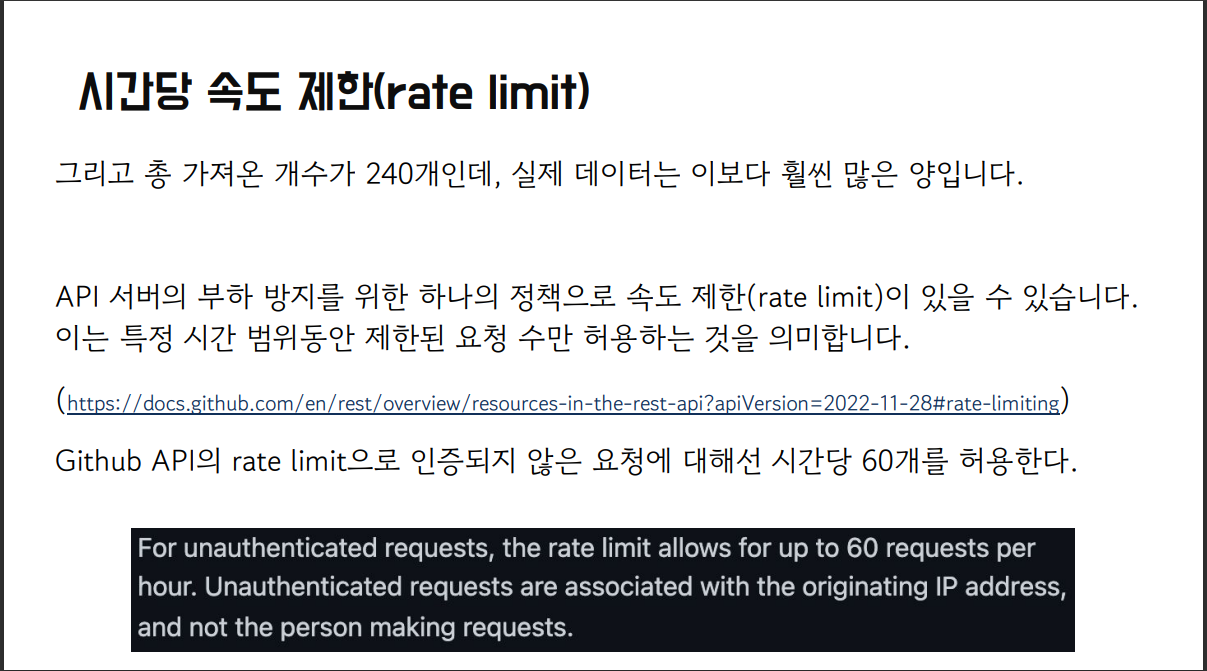

In [ ]:
# 응답 헤더에서 사용량 조회하기

In [33]:
response = requests.head('https://api.github.com/repos/pytorch/pytorch/issues/comments')
print('X-Ratelimit-Limit', response.headers['X-Ratelimit-Limit'])
print('X-Ratelimit-Remaining', response.headers['X-Ratelimit-Remaining'])

# UTC 시간을 사람이 읽을 수 있는 형식으로 변환
import datetime
print('Rate Limit reset at', datetime.datetime.fromtimestamp(int(response.headers['X-RateLimit-Reset'])).strftime('%c'))

X-Ratelimit-Limit 60
X-Ratelimit-Remaining 0
Rate Limit reset at Mon Feb 27 17:12:36 2023


In [34]:
# 분당 속도 제한(rate limit)

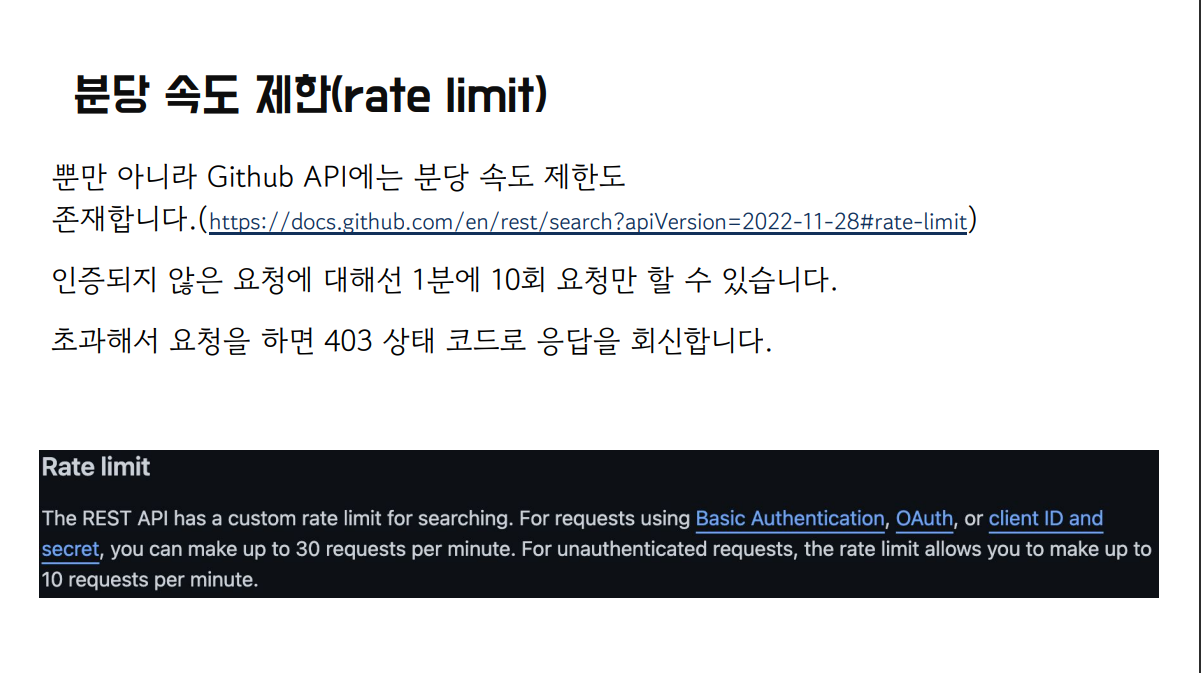

# API 호출 속도 조절하기

In [35]:
from datetime import datetime
import time

def handle_rate_limits(response):
    now = datetime.now()
    reset_time = datetime.fromtimestamp(int(response.headers['X-RateLimit-Reset']))
    remaining_requests  = response.headers['X-Ratelimit-Remainig']
    remaining_time = (reset_time - now).total_seconds()
    intervals = remaining_time / (1.0 + int(remaining_requests))
    
    print('Sleeping for', intervals)
    time.sleep(intervals)
    return True

# 네트워크 오류를 감안한 코드1

In [37]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500,503,504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount('https://', retry_adapter)
http.mount('https://', retry_adapter)

response = http.get('https://api.github.com/search/repositories',
                   params = {'q': 'data_science+language:python'})

for item in response.json()['items'][:5]:
    print(item['name'])

data-science-from-scratch
PySyft
data-science-blogs
galaxy
DataCamp


# 네트워크 오류를 감안한 코드2

In [ ]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

retry_strategy = Retry(
    total=5,
    status_forcelist=[500,503,504],
    backoff_factor=1
)

retry_adapter = HTTPAdapter(max_retries=retry_strategy)

http = requests.Session()
http.mount('https://', retry_adapter)
http.mount('https://', retry_adapter)

response = http.get('https://api.github.com/search/repositories',
                   params = {'q': 'data_science+language:python'})

for item in response.json()['items'][:5]:
    print(item['name'])